In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from collections import defaultdict

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
conferences_file = os.path.join("..", "data", "interim", "WikiCFP", "WikiCFP_conferences.pkl")
os.path.isfile(conferences_file)

True

In [4]:
# Load crawled conferences
global conferences
conferences = pd.DataFrame()
with open(conferences_file, "rb") as f:
    conferences = pickle.load(f)

In [5]:
print("Total number of conferences crawled: {}.".format(len(conferences)))

Total number of conferences crawled: 3387.


## Conferences per year

In [6]:
def getConferencesPerYear(year):
    conferences_in_year = pd.DataFrame()
    if conferences.start_date.astype(str).str.contains(year).any():
        conferences_in_year = conferences[conferences.start_date.astype(str).str.contains(year)]            
    else:
        print("There are no conferences taking place in {}.\n".format(year))

    return conferences_in_year

In [7]:
cols = ['year', 'count_conferences']
data = []
for year in range(2018,2022):
    no_conf = len(getConferencesPerYear(str(year)))
    data.append([year, no_conf])
yearly_conferences = pd.DataFrame(data, columns=cols)

In [8]:
yearly_conferences

,year,count_conferences
0,2018,2
1,2019,1202
2,2020,1906
3,2021,20


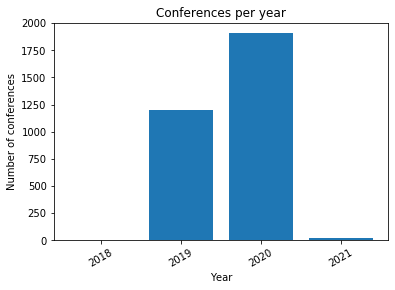

In [9]:
# Plot distribution of conferences per year
years = yearly_conferences['year'].tolist()
index = np.arange(len(years))
no_conf = yearly_conferences['count_conferences'].tolist()
plt.bar(index, no_conf, align = 'center')
plt.xlabel('Year')
plt.ylabel('Number of conferences')
plt.title('Conferences per year')
plt.xticks(index, years, rotation=30)
plt.show()

In [10]:
print("Mean # of conferences per year: {}".format(round(yearly_conferences.mean()[1],2)))
print("Median # of conferences per year: {}".format(round(yearly_conferences.median()[1], 2)))

Mean # of conferences per year: 782.5
Median # of conferences per year: 611.0


## Conferences with incomplete information

In [11]:
no_start_date = set(conferences.index[conferences.start_date.isnull()])
no_end_date = set(conferences.index[conferences.end_date.isnull()])
no_location = set(conferences.index[conferences.location.isnull()])
no_submission_deadline = set(conferences.index[conferences.submission_deadline.isnull()])

print("Confereneces without start date: {}".format(len(no_start_date)))
print("Confereneces without end date: {}".format(len(no_end_date)))
print("Confereneces without location: {}".format(len(no_location)))
print("Confereneces without submission deadline: {}".format(len(no_submission_deadline)))

no_date_location = no_start_date.union(no_location)
print("Conferences without date or location: {}".format(len(no_date_location)))

no_date_loc_deadline = no_date_location.union(no_submission_deadline)
print("Conferences without date, location, or submission deadline: {}".format(len(no_date_loc_deadline)))

Confereneces without start date: 251
Confereneces without end date: 251
Confereneces without location: 283
Confereneces without submission deadline: 248
Conferences without date or location: 292
Conferences without date, location, or submission deadline: 504


In [12]:
a = no_start_date.intersection(no_location)
len(no_location.intersection(no_submission_deadline))

34

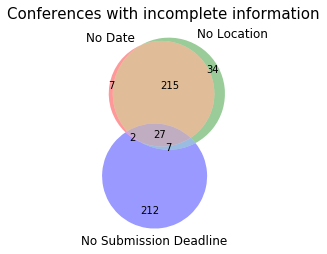

In [13]:
v = venn3([no_start_date, no_location, no_submission_deadline], 
      set_labels = ('No Date', 'No Location', 'No Submission Deadline'))
plt.title('Conferences with incomplete information', fontsize = 15)
plt.show()

## Conferences per category

In [14]:
categories = set(category for categories in conferences.categories.tolist() for category in categories)
print("Categories: {}".format(len(categories)))

Categories: 3196


In [15]:
conf_list = conferences.index.tolist()
count_categ = list()
for index in conferences.index.tolist():
    count_categ.append(len(conferences.categories[index]))
categ_per_conf = pd.DataFrame({"conference": conf_list, "count_categories": count_categ})

In [16]:
categ_per_conf.head()

,conference,count_categories
0,90002,4
1,90006,4
2,90007,4
3,90008,3
4,90009,3


In [17]:
count_with_category = len(categ_per_conf[categ_per_conf["count_categories"]>0])
count_without_category = len(categ_per_conf[categ_per_conf["count_categories"]==0])
print("Conferences with at least a category: {}".format(count_with_category))
print("Conferences without a category: {}".format(count_without_category))

Conferences with at least a category: 3092
Conferences without a category: 295


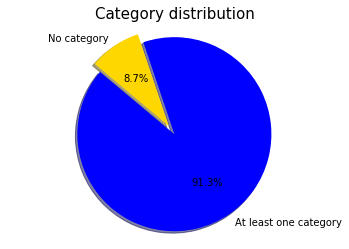

In [18]:
# Plot category distribution
labels = 'At least one category', 'No category'
sizes = [count_with_category, count_without_category]
colors = ['blue', 'gold']
explode = (0, 0.1)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Category distribution", fontsize = 15)
plt.axis('equal')
plt.show()

In [19]:
# Category distribution per conference
print("Mean # of categories per conferences: {}".format(round(categ_per_conf.mean()[1], 2)))
print("Median # of categories per conferences: {}".format(round(categ_per_conf.median()[1], 2)))

Mean # of categories per conferences: 3.32
Median # of categories per conferences: 4.0


In [20]:
conf_per_categ = defaultdict(int)
for category in categories:
    print("Searching for category: {}".format(category))
    for index in conferences.index.tolist():
        if category in conferences['categories'][index]:
            conf_per_categ[category] += 1
    print("Finished searching for category: {}\n".format(category))

Searching for category: religion
Finished searching for category: religion

Searching for category: public policies on aging
Finished searching for category: public policies on aging

Searching for category: natural language processingâ
Finished searching for category: natural language processingâ

Searching for category: learning assessment
Finished searching for category: learning assessment

Searching for category: life sciences
Finished searching for category: life sciences

Searching for category: parallel systems
Finished searching for category: parallel systems

Searching for category: business law
Finished searching for category: business law

Searching for category: systems design & technology
Finished searching for category: systems design & technology

Searching for category: education management
Finished searching for category: education management

Searching for category: crypto
Finished searching for category: crypto

Searching for category: performance modeling
Finished 

Finished searching for category: uncertainty

Searching for category: food structure
Finished searching for category: food structure

Searching for category: applied science
Finished searching for category: applied science

Searching for category: innovative technologies
Finished searching for category: innovative technologies

Searching for category: devices and systems
Finished searching for category: devices and systems

Searching for category: long
Finished searching for category: long

Searching for category: critical infrastructures
Finished searching for category: critical infrastructures

Searching for category: hawaii
Finished searching for category: hawaii

Searching for category: antennas
Finished searching for category: antennas

Searching for category: industrial engineering
Finished searching for category: industrial engineering

Searching for category: lifescience
Finished searching for category: lifescience

Searching for category: computer communications
Finished searc

Finished searching for category: ai applications in smart cyber

Searching for category: citizenship
Finished searching for category: citizenship

Searching for category: knowledge sharing
Finished searching for category: knowledge sharing

Searching for category: legal
Finished searching for category: legal

Searching for category: reconstructive surgery
Finished searching for category: reconstructive surgery

Searching for category: ict acceptance and adoption
Finished searching for category: ict acceptance and adoption

Searching for category: combinatorics/codes/designs/gr
Finished searching for category: combinatorics/codes/designs/gr

Searching for category: human rights law
Finished searching for category: human rights law

Searching for category: childcare
Finished searching for category: childcare

Searching for category: futures
Finished searching for category: futures

Searching for category: general & clinical pediatrics
Finished searching for category: general & clinical p

Finished searching for category: emerging technologies & ai

Searching for category: ocr models
Finished searching for category: ocr models

Searching for category: teaching
Finished searching for category: teaching

Searching for category: evolving systems
Finished searching for category: evolving systems

Searching for category: security & privacy
Finished searching for category: security & privacy

Searching for category: linguistics conference
Finished searching for category: linguistics conference

Searching for category: immersive technology
Finished searching for category: immersive technology

Searching for category: SOFT COMPUTING TECHNIQUES
Finished searching for category: SOFT COMPUTING TECHNIQUES

Searching for category: cognitive intelligence
Finished searching for category: cognitive intelligence

Searching for category: astronomy
Finished searching for category: astronomy

Searching for category: ALZHEIMER DISEASE
Finished searching for category: ALZHEIMER DISEASE

Searc

Finished searching for category: software system

Searching for category: health economics
Finished searching for category: health economics

Searching for category: astrophysics
Finished searching for category: astrophysics

Searching for category: materials science and engineer
Finished searching for category: materials science and engineer

Searching for category: knowledge engineering
Finished searching for category: knowledge engineering

Searching for category: tourism and hospitality
Finished searching for category: tourism and hospitality

Searching for category: aging science
Finished searching for category: aging science

Searching for category: resource brokering
Finished searching for category: resource brokering

Searching for category: #remotework
Finished searching for category: #remotework

Searching for category: enterprise management
Finished searching for category: enterprise management

Searching for category: software product lines
Finished searching for category: 

Finished searching for category: conceptual modeling

Searching for category: generalizability
Finished searching for category: generalizability

Searching for category: agriculture conferences
Finished searching for category: agriculture conferences

Searching for category: accessibility
Finished searching for category: accessibility

Searching for category: coatings and films
Finished searching for category: coatings and films

Searching for category: computer architecture
Finished searching for category: computer architecture

Searching for category: green house gas
Finished searching for category: green house gas

Searching for category: social science research
Finished searching for category: social science research

Searching for category: communities
Finished searching for category: communities

Searching for category: algebras
Finished searching for category: algebras

Searching for category: google technologies
Finished searching for category: google technologies

Searching fo

Finished searching for category: welding

Searching for category: meio ambiente
Finished searching for category: meio ambiente

Searching for category: management science
Finished searching for category: management science

Searching for category: intelligent things
Finished searching for category: intelligent things

Searching for category: iot security
Finished searching for category: iot security

Searching for category: edge computing
Finished searching for category: edge computing

Searching for category: humanitarian sciences
Finished searching for category: humanitarian sciences

Searching for category: cloud & mobile edge computing
Finished searching for category: cloud & mobile edge computing

Searching for category: solar energy conversion
Finished searching for category: solar energy conversion

Searching for category: optimization technologies and
Finished searching for category: optimization technologies and

Searching for category: biotechnology conferences-2020
Finished 

Finished searching for category: signal, image and speech

Searching for category: international conference
Finished searching for category: international conference

Searching for category: MEETING
Finished searching for category: MEETING

Searching for category: containers
Finished searching for category: containers

Searching for category: polymer composites
Finished searching for category: polymer composites

Searching for category: global health
Finished searching for category: global health

Searching for category: control technology
Finished searching for category: control technology

Searching for category: animal & plant sciences
Finished searching for category: animal & plant sciences

Searching for category: diversity
Finished searching for category: diversity

Searching for category: stroke
Finished searching for category: stroke

Searching for category: borders
Finished searching for category: borders

Searching for category: healthcare conferences 2019
Finished searching 

Finished searching for category: database systems

Searching for category: web-based services
Finished searching for category: web-based services

Searching for category: global studies
Finished searching for category: global studies

Searching for category: BUSINESS, MANAGEMENT
Finished searching for category: BUSINESS, MANAGEMENT

Searching for category: defense system applications an
Finished searching for category: defense system applications an

Searching for category: reconfigurable computing
Finished searching for category: reconfigurable computing

Searching for category: academe
Finished searching for category: academe

Searching for category: ethnopharmacology
Finished searching for category: ethnopharmacology

Searching for category: chemical science
Finished searching for category: chemical science

Searching for category: identity
Finished searching for category: identity

Searching for category: libraries
Finished searching for category: libraries

Searching for category:

Finished searching for category: geo information system

Searching for category: user experience
Finished searching for category: user experience

Searching for category: mobile systems
Finished searching for category: mobile systems

Searching for category: game-based learning
Finished searching for category: game-based learning

Searching for category: pharma conferences
Finished searching for category: pharma conferences

Searching for category: sustainable development
Finished searching for category: sustainable development

Searching for category: cancer conference
Finished searching for category: cancer conference

Searching for category: software
Finished searching for category: software

Searching for category: â¢ medicinal plants cultivation
Finished searching for category: â¢ medicinal plants cultivation

Searching for category: dubai, uae
Finished searching for category: dubai, uae

Searching for category: applied ai
Finished searching for category: applied ai

Searching f

Finished searching for category: learning design

Searching for category: software testing
Finished searching for category: software testing

Searching for category: strategic studies
Finished searching for category: strategic studies

Searching for category: ai / machine learning
Finished searching for category: ai / machine learning

Searching for category: infectious disease
Finished searching for category: infectious disease

Searching for category: modes verbaux
Finished searching for category: modes verbaux

Searching for category: cosmetology
Finished searching for category: cosmetology

Searching for category: run-time management
Finished searching for category: run-time management

Searching for category: nursing research
Finished searching for category: nursing research

Searching for category: big data management and analyt
Finished searching for category: big data management and analyt

Searching for category: ebrains
Finished searching for category: ebrains

Searching for 

Finished searching for category: intelligent user interfaces

Searching for category: social accountability
Finished searching for category: social accountability

Searching for category: meet up
Finished searching for category: meet up

Searching for category: distance work
Finished searching for category: distance work

Searching for category: science studies
Finished searching for category: science studies

Searching for category: food microbiology
Finished searching for category: food microbiology

Searching for category: latin american studies
Finished searching for category: latin american studies

Searching for category: simulations
Finished searching for category: simulations

Searching for category: business marketing
Finished searching for category: business marketing

Searching for category: social emotional learning
Finished searching for category: social emotional learning

Searching for category: e-learning
Finished searching for category: e-learning

Searching for catego

Finished searching for category: psychology of addicts

Searching for category: satisfiability testing
Finished searching for category: satisfiability testing

Searching for category: prison
Finished searching for category: prison

Searching for category: supply chain best practices
Finished searching for category: supply chain best practices

Searching for category: sustainable architecture
Finished searching for category: sustainable architecture

Searching for category: manufacturing
Finished searching for category: manufacturing

Searching for category: agri-aquaculture
Finished searching for category: agri-aquaculture

Searching for category: educational psychology
Finished searching for category: educational psychology

Searching for category: computaã§ã£o na nuvem
Finished searching for category: computaã§ã£o na nuvem

Searching for category: internet technologies and appl
Finished searching for category: internet technologies and appl

Searching for category: millimeterwave
Fin

Finished searching for category: child health

Searching for category: molecular biology
Finished searching for category: molecular biology

Searching for category: political science
Finished searching for category: political science

Searching for category: wearables
Finished searching for category: wearables

Searching for category: dark side
Finished searching for category: dark side

Searching for category: hospitality
Finished searching for category: hospitality

Searching for category: optical wireless
Finished searching for category: optical wireless

Searching for category: batteries
Finished searching for category: batteries

Searching for category: softwere
Finished searching for category: softwere

Searching for category: spectrum management
Finished searching for category: spectrum management

Searching for category: smart services
Finished searching for category: smart services

Searching for category: ecological engineering
Finished searching for category: ecological engi

Finished searching for category: liver

Searching for category: english/ elt
Finished searching for category: english/ elt

Searching for category: RFID
Finished searching for category: RFID

Searching for category: design research
Finished searching for category: design research

Searching for category: water for the environment
Finished searching for category: water for the environment

Searching for category: query processing in spark sql
Finished searching for category: query processing in spark sql

Searching for category: multi/many-core architectures
Finished searching for category: multi/many-core architectures

Searching for category: UAS
Finished searching for category: UAS

Searching for category: multimodal interfaces
Finished searching for category: multimodal interfaces

Searching for category: testing
Finished searching for category: testing

Searching for category: trends
Finished searching for category: trends

Searching for category: vibration engineering
Finished sea

Finished searching for category: spoken language processing

Searching for category: hiv epidemiology
Finished searching for category: hiv epidemiology

Searching for category: big data and analytics
Finished searching for category: big data and analytics

Searching for category: microwave
Finished searching for category: microwave

Searching for category: event
Finished searching for category: event

Searching for category: medicine conferences
Finished searching for category: medicine conferences

Searching for category: hyperspectral imaging
Finished searching for category: hyperspectral imaging

Searching for category: electric es & tlecom
Finished searching for category: electric es & tlecom

Searching for category: subjonctif
Finished searching for category: subjonctif

Searching for category: assesment
Finished searching for category: assesment

Searching for category: model-driven engineering
Finished searching for category: model-driven engineering

Searching for category: pat

Finished searching for category: security and provacy

Searching for category: social science of animal he
Finished searching for category: social science of animal he

Searching for category: game design
Finished searching for category: game design

Searching for category: evolutionary computation
Finished searching for category: evolutionary computation

Searching for category: probabilistic programming
Finished searching for category: probabilistic programming

Searching for category: stochastic optimization
Finished searching for category: stochastic optimization

Searching for category: cell biology
Finished searching for category: cell biology

Searching for category: wireless simulation
Finished searching for category: wireless simulation

Searching for category: form
Finished searching for category: form

Searching for category: performance analysis
Finished searching for category: performance analysis

Searching for category: infrastructures
Finished searching for category: in

Finished searching for category: stem cell therapy

Searching for category: traditional medicine
Finished searching for category: traditional medicine

Searching for category: distributed computation
Finished searching for category: distributed computation

Searching for category: blockchains
Finished searching for category: blockchains

Searching for category: sciences
Finished searching for category: sciences

Searching for category: consumer personality
Finished searching for category: consumer personality

Searching for category: impaired and augmented man
Finished searching for category: impaired and augmented man

Searching for category: search
Finished searching for category: search

Searching for category: CI/CD
Finished searching for category: CI/CD

Searching for category: 5g and edge
Finished searching for category: 5g and edge

Searching for category: smart systems: a path towards
Finished searching for category: smart systems: a path towards

Searching for category: writin

Finished searching for category: foundations of performance and

Searching for category: european history
Finished searching for category: european history

Searching for category: dependable conmputing
Finished searching for category: dependable conmputing

Searching for category: CIENCIAS DE LA INGENIERÃA
Finished searching for category: CIENCIAS DE LA INGENIERÃA

Searching for category: industrial electronics
Finished searching for category: industrial electronics

Searching for category: goverment
Finished searching for category: goverment

Searching for category: BIGDATA
Finished searching for category: BIGDATA

Searching for category: business technology
Finished searching for category: business technology

Searching for category: iot in cloud
Finished searching for category: iot in cloud

Searching for category: chemical engineering, biochemi
Finished searching for category: chemical engineering, biochemi

Searching for category: neurodegeneration
Finished searching for catego

Finished searching for category: telecomunicaã§ãµes

Searching for category: central asian studies
Finished searching for category: central asian studies

Searching for category: cyber security
Finished searching for category: cyber security

Searching for category: visual environments
Finished searching for category: visual environments

Searching for category: abstract interpretation
Finished searching for category: abstract interpretation

Searching for category: management and organisational
Finished searching for category: management and organisational

Searching for category: BPM
Finished searching for category: BPM

Searching for category: physiological measurement
Finished searching for category: physiological measurement

Searching for category: electric vehicles
Finished searching for category: electric vehicles

Searching for category: mobile services
Finished searching for category: mobile services

Searching for category: robotics conference
Finished searching for category

Finished searching for category: humanitarian relief and develo

Searching for category: rheumatology
Finished searching for category: rheumatology

Searching for category: medical conference
Finished searching for category: medical conference

Searching for category: ACCOUNTING
Finished searching for category: ACCOUNTING

Searching for category: test requirement analysis
Finished searching for category: test requirement analysis

Searching for category: rehabilation
Finished searching for category: rehabilation

Searching for category: web services
Finished searching for category: web services

Searching for category: trade unionism
Finished searching for category: trade unionism

Searching for category: model
Finished searching for category: model

Searching for category: smart cities
Finished searching for category: smart cities

Searching for category: user modeling
Finished searching for category: user modeling

Searching for category: medical event
Finished searching for category

Finished searching for category: e-democracy

Searching for category: weight management
Finished searching for category: weight management

Searching for category: decision making
Finished searching for category: decision making

Searching for category: science & technology research
Finished searching for category: science & technology research

Searching for category: neurosurgery meeting europe
Finished searching for category: neurosurgery meeting europe

Searching for category: systems testing & reliability
Finished searching for category: systems testing & reliability

Searching for category: services industry
Finished searching for category: services industry

Searching for category: cardiology meetings 2020
Finished searching for category: cardiology meetings 2020

Searching for category: meaning
Finished searching for category: meaning

Searching for category: aviation
Finished searching for category: aviation

Searching for category: cloud based communication
Finished searching

Finished searching for category: SOCIO-PSYCHO SPIRITUALITY

Searching for category: OBESITY
Finished searching for category: OBESITY

Searching for category: food chemistry
Finished searching for category: food chemistry

Searching for category: digital transformation
Finished searching for category: digital transformation

Searching for category: poster
Finished searching for category: poster

Searching for category: medical humanities
Finished searching for category: medical humanities

Searching for category: advanced functional materials
Finished searching for category: advanced functional materials

Searching for category: accelerators
Finished searching for category: accelerators

Searching for category: education psychology
Finished searching for category: education psychology

Searching for category: tuberculosis
Finished searching for category: tuberculosis

Searching for category: numerical simulation
Finished searching for category: numerical simulation

Searching for catego

Finished searching for category: video technology

Searching for category: WATER PARK
Finished searching for category: WATER PARK

Searching for category: meetings
Finished searching for category: meetings

Searching for category: personalization
Finished searching for category: personalization

Searching for category: SEZ
Finished searching for category: SEZ

Searching for category: violence
Finished searching for category: violence

Searching for category: ict in education & training
Finished searching for category: ict in education & training

Searching for category: biomedicine
Finished searching for category: biomedicine

Searching for category: asia
Finished searching for category: asia

Searching for category: dental conference
Finished searching for category: dental conference

Searching for category: chemoinformatics
Finished searching for category: chemoinformatics

Searching for category: NANO
Finished searching for category: NANO

Searching for category: healthcare
Finished

Finished searching for category: cloud & security

Searching for category: history
Finished searching for category: history

Searching for category: nanoscience
Finished searching for category: nanoscience

Searching for category: EQUITY
Finished searching for category: EQUITY

Searching for category: culture studies
Finished searching for category: culture studies

Searching for category: future studies
Finished searching for category: future studies

Searching for category: emotion recognition
Finished searching for category: emotion recognition

Searching for category: education and agriculture
Finished searching for category: education and agriculture

Searching for category: kink
Finished searching for category: kink

Searching for category: fault detection
Finished searching for category: fault detection

Searching for category: social equality
Finished searching for category: social equality

Searching for category: hci in ict4d
Finished searching for category: hci in ict4d

Sea

Finished searching for category: self-driving

Searching for category: mystery
Finished searching for category: mystery

Searching for category: smart home
Finished searching for category: smart home

Searching for category: hospitality communication
Finished searching for category: hospitality communication

Searching for category: information technology
Finished searching for category: information technology

Searching for category: learning methodologies
Finished searching for category: learning methodologies

Searching for category: business economics
Finished searching for category: business economics

Searching for category: trans fer learning
Finished searching for category: trans fer learning

Searching for category: language conference
Finished searching for category: language conference

Searching for category: - cloud key management
Finished searching for category: - cloud key management

Searching for category: signal technology
Finished searching for category: signal techn

Finished searching for category: hmi for explainable ai

Searching for category: sql server
Finished searching for category: sql server

Searching for category: heterogenous systems
Finished searching for category: heterogenous systems

Searching for category: knowledge graphs
Finished searching for category: knowledge graphs

Searching for category: pediatric dentristry
Finished searching for category: pediatric dentristry

Searching for category: humor
Finished searching for category: humor

Searching for category: mobile medical units
Finished searching for category: mobile medical units

Searching for category: business intelligence
Finished searching for category: business intelligence

Searching for category: computer system
Finished searching for category: computer system

Searching for category: secure communication
Finished searching for category: secure communication

Searching for category: tools
Finished searching for category: tools

Searching for category: digital signal 

Finished searching for category: hypertext

Searching for category: service-oriented architectures
Finished searching for category: service-oriented architectures

Searching for category: location based service
Finished searching for category: location based service

Searching for category: epistemology
Finished searching for category: epistemology

Searching for category: TECHNOLOGY-TRENDS
Finished searching for category: TECHNOLOGY-TRENDS

Searching for category: data modeling/machine learning
Finished searching for category: data modeling/machine learning

Searching for category: social medicine
Finished searching for category: social medicine

Searching for category: occupational health
Finished searching for category: occupational health

Searching for category: smart building
Finished searching for category: smart building

Searching for category: forecasting
Finished searching for category: forecasting

Searching for category: radio frequency
Finished searching for category: rad

Finished searching for category: neuro oncology

Searching for category: security and privacy
Finished searching for category: security and privacy

Searching for category: review articles
Finished searching for category: review articles

Searching for category: inter-disciplinary
Finished searching for category: inter-disciplinary

Searching for category: operating systems
Finished searching for category: operating systems

Searching for category: performance engineering
Finished searching for category: performance engineering

Searching for category: primarycare conference
Finished searching for category: primarycare conference

Searching for category: lifelong learning
Finished searching for category: lifelong learning

Searching for category: mental illness conference
Finished searching for category: mental illness conference

Searching for category: virtual exchange
Finished searching for category: virtual exchange

Searching for category: ciencias agroalimentarias
Finished search

Finished searching for category: medical imaging

Searching for category: advanced material science
Finished searching for category: advanced material science

Searching for category: edge and fog computing
Finished searching for category: edge and fog computing

Searching for category: the arab nation state
Finished searching for category: the arab nation state

Searching for category: context aware
Finished searching for category: context aware

Searching for category: automation and control
Finished searching for category: automation and control

Searching for category: veriffication
Finished searching for category: veriffication

Searching for category: sensing intelligence
Finished searching for category: sensing intelligence

Searching for category: biohybrid
Finished searching for category: biohybrid

Searching for category: underwater communication
Finished searching for category: underwater communication

Searching for category: energy efficiency
Finished searching for categor

Finished searching for category: building / chemical materials

Searching for category: ï rf, microwave and millimeter
Finished searching for category: ï rf, microwave and millimeter

Searching for category: cardiovascular diseases
Finished searching for category: cardiovascular diseases

Searching for category: information retrieval
Finished searching for category: information retrieval

Searching for category: repositories
Finished searching for category: repositories

Searching for category: time
Finished searching for category: time

Searching for category: polymers science
Finished searching for category: polymers science

Searching for category: english education
Finished searching for category: english education

Searching for category: political sciences
Finished searching for category: political sciences

Searching for category: engneering
Finished searching for category: engneering

Searching for category: multi-cloud
Finished searching for category: multi-cloud

Searchin

Finished searching for category: privacy fairness transparency

Searching for category: learning disabilities
Finished searching for category: learning disabilities

Searching for category: case studies
Finished searching for category: case studies

Searching for category: statistical theory
Finished searching for category: statistical theory

Searching for category: area studies
Finished searching for category: area studies

Searching for category: gravitation
Finished searching for category: gravitation

Searching for category: hybrid ai
Finished searching for category: hybrid ai

Searching for category: agriculture and forestry
Finished searching for category: agriculture and forestry

Searching for category: english literature
Finished searching for category: english literature

Searching for category: biosensors
Finished searching for category: biosensors

Searching for category: configuration
Finished searching for category: configuration

Searching for category: HIV-AIDS
Finishe

Finished searching for category: automation

Searching for category: future computing
Finished searching for category: future computing

Searching for category: genomics
Finished searching for category: genomics

Searching for category: peacebuilding
Finished searching for category: peacebuilding

Searching for category: disaster manangement
Finished searching for category: disaster manangement

Searching for category: robots
Finished searching for category: robots

Searching for category: pervasive health and society
Finished searching for category: pervasive health and society

Searching for category: melonoma
Finished searching for category: melonoma

Searching for category: art
Finished searching for category: art

Searching for category: HPC
Finished searching for category: HPC

Searching for category: optical measurement
Finished searching for category: optical measurement

Searching for category: astroinformatics
Finished searching for category: astroinformatics

Searching for c


Searching for category: gutmicrobiome
Finished searching for category: gutmicrobiome

Searching for category: data challenge
Finished searching for category: data challenge

Searching for category: cancer drugs
Finished searching for category: cancer drugs

Searching for category: industrial design
Finished searching for category: industrial design

Searching for category: biology : plant science
Finished searching for category: biology : plant science

Searching for category: heath sciences
Finished searching for category: heath sciences

Searching for category: neuromarketing
Finished searching for category: neuromarketing

Searching for category: HEART
Finished searching for category: HEART

Searching for category: education conference
Finished searching for category: education conference

Searching for category: estuatine coastal science
Finished searching for category: estuatine coastal science

Searching for category: call
Finished searching for category: call

Searching for cat

Finished searching for category: optoelectronics

Searching for category: pattern recognition
Finished searching for category: pattern recognition

Searching for category: isds
Finished searching for category: isds

Searching for category: digital marketing
Finished searching for category: digital marketing

Searching for category: public sector
Finished searching for category: public sector

Searching for category: distribution and concurrency
Finished searching for category: distribution and concurrency

Searching for category: big spatial analysis
Finished searching for category: big spatial analysis

Searching for category: otolaryngology conferences
Finished searching for category: otolaryngology conferences

Searching for category: software reliability
Finished searching for category: software reliability

Searching for category: 806
Finished searching for category: 806

Searching for category: parallel computing
Finished searching for category: parallel computing

Searching for 


Searching for category: iot and cloud computing
Finished searching for category: iot and cloud computing

Searching for category: infection
Finished searching for category: infection

Searching for category: sustainability,
Finished searching for category: sustainability,

Searching for category: ceramics
Finished searching for category: ceramics

Searching for category: speech recognition
Finished searching for category: speech recognition

Searching for category: pediatric hematology
Finished searching for category: pediatric hematology

Searching for category: professional development
Finished searching for category: professional development

Searching for category: algorithm
Finished searching for category: algorithm

Searching for category: neurois
Finished searching for category: neurois

Searching for category: biotech
Finished searching for category: biotech

Searching for category: next generation networks
Finished searching for category: next generation networks

Searching f

In [23]:
categories_distribution = pd.DataFrame(list(conf_per_categ.items()), columns=['category', 'count_conferences'])
categories_distribution.head()

,category,count_conferences
0,religion,14
1,public policies on aging,1
2,natural language processingâ,1
3,learning assessment,1
4,life sciences,12


In [25]:
print(len(categories_distribution))

3196


In [39]:
categories_distribution.sort_values(by="count_conferences", ascending=False, inplace=True)
categories_distribution[:10]

,category,count_conferences
421,artificial intelligence,278
394,computer science,254
3178,engineering,237
1314,machine learning,179
2265,information technology,150
2097,education,137
2963,big data,110
1004,robotics,100
291,cloud computing,98
3136,energy,93


In [26]:
categories_file = os.path.join("..", "data","interim","WikiCFP", "categories_dicstribution.pkl")

In [27]:
# Save dictionary
with open(categories_file,"wb") as f:
    pickle.dump(conf_per_categ, f)

In [28]:
# Load dictionary
with open(categories_file,"rb") as f:
    conf_per_categ = pickle.load(f)

In [29]:
print("Mean # of conferences per category: {}".format(round(categories_distribution.mean()[0])))
print("Median # of conferences per category: {}".format(round(categories_distribution.median()[0])))

Mean # of conferences per category: 4.0
Median # of conferences per category: 1.0


## Conference Series

In [30]:
conf_series = conferences[~pd.isnull(conferences["conference_series"])]['conference_series']
print("There are {} conference series.".format(len(conf_series)))

There are 254 conference series.


In [31]:
conf_series_unique = conf_series.drop_duplicates()
print("There are {} unique conference series.".format(len(conf_series_unique)))

There are 252 unique conference series.


In [32]:
conf_per_series = list()
for series in conf_series_unique:
    count = 0
    for idx in conferences.index.tolist():
        if conferences.loc[idx]["conference_series"] == series:
            count += 1
    conf_per_series.append((series, count))

In [33]:
conf_per_series = pd.DataFrame(conf_per_series, columns = ["conference_series", "count_conference_series"])
len(conf_per_series)

252

In [34]:
counts = list(map(int, conf_per_series["count_conference_series"]))
np.mean(counts)

1.007936507936508

In [35]:
print("Mean # of conferences per series: {}".format(np.mean(counts)))
print("Median # of conferences per series: {}".format(np.median(counts)))

Mean # of conferences per series: 1.007936507936508
Median # of conferences per series: 1.0


In [36]:
print("Max # of conferences per series: {}".format(np.max(counts)))
print("Min # of conferences per series: {}".format(np.min(counts)))

Max # of conferences per series: 2
Min # of conferences per series: 1
